In [22]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [24]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [25]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [26]:
tf.keras.backend.clear_session()

In [27]:
subject = 'Tocantins - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 36
train_split = split_index + 1 - 12

In [28]:
data = pd.read_csv('2003_raw_Tocantins_input.csv')
data = data[[col for col in data.columns if col != subject] + [subject]] #Seta consumo (target) para a coluna final
data = data.replace(-1.0, np.nan)
data

,data,Tocantins - PIB - Per Capita,Tocantins - PIB - Preços de Mercado,Tocantins - PIB - Estadual,Tocantins - PIB - Construção Civil,Tocantins - População,Tocantins - INCC (%),Tocantins - IPCA - Variação mensal durante o Plano Real (%),Tocantins - IGP-DI,Tocantins - Taxa Selic (%),Tocantins - IDH - Longevidade,Tocantins - IDH - Renda,Tocantins - IDH - Educação,Tocantins - NFSP - Fluxo Mensal (Milhões de reais),Tocantins - Estoque liquido de capital fixo - (R$),Tocantins - Desemprego,Tocantins - Produção de Cimento (t),Tocantins - Valor,Tocantins - Consumo de Cimento (t)
0,2003-01-01,7.558507e+05,3.978694e+05,0.626215,927755.471936,1207014.0,1.70,12.53,2.70,0.082293,0.688,0.605,0.348,3.46,6.098524e+06,8.634615,NaN,NaN,17555.0
1,2003-02-01,7.558507e+05,3.978694e+05,0.626215,927755.471936,1207014.0,1.51,2.25,2.17,0.088771,0.688,0.605,0.348,3.59,6.172460e+06,8.634615,NaN,NaN,14976.0
2,2003-03-01,7.558507e+05,3.978694e+05,0.626215,927755.471936,1207014.0,1.39,3.86,1.59,0.090733,0.688,0.605,0.348,3.84,6.172460e+06,8.634615,30695.0,NaN,13334.0
3,2003-04-01,7.558507e+05,3.978694e+05,0.626215,927755.471936,1207014.0,1.38,5.13,1.66,0.092749,0.688,0.605,0.348,3.95,6.172460e+06,8.634615,137203.0,NaN,15173.0
4,2003-05-01,7.558507e+05,3.978694e+05,0.626215,927755.471936,1207014.0,0.90,6.15,0.41,0.092758,0.688,0.605,0.348,4.06,6.172460e+06,8.634615,55045.0,NaN,18728.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2019-08-01,1.585925e+06,2.675998e+06,1.019737,992936.494099,1555229.0,0.58,2.42,-0.01,0.024620,0.810,0.700,0.730,0.69,7.827728e+06,12.300000,78527.0,NaN,40046.0
200,2019-09-01,1.585925e+06,2.675998e+06,1.019737,992936.494099,1555229.0,0.42,2.54,-0.51,0.022751,0.810,0.700,0.730,0.62,7.827728e+06,12.000000,NaN,NaN,32647.0
201,2019-10-01,1.585925e+06,2.675998e+06,1.019737,992936.494099,1555229.0,0.46,2.49,0.50,0.022035,0.810,0.700,0.730,0.59,7.827728e+06,11.900000,114896.0,NaN,39065.0
202,2019-11-01,1.585925e+06,2.675998e+06,1.019737,992936.494099,1555229.0,0.18,2.60,0.55,0.020790,0.810,0.700,0.730,0.57,7.827728e+06,11.700000,NaN,NaN,36180.0


In [29]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data = target_data/1000
target_data

0      29.644
1      25.375
2      25.608
3      30.043
4      28.702
        ...  
199       NaN
200       NaN
201       NaN
202       NaN
203       NaN
Name: Tocantins - Consumo de Cimento (t), Length: 204, dtype: float64

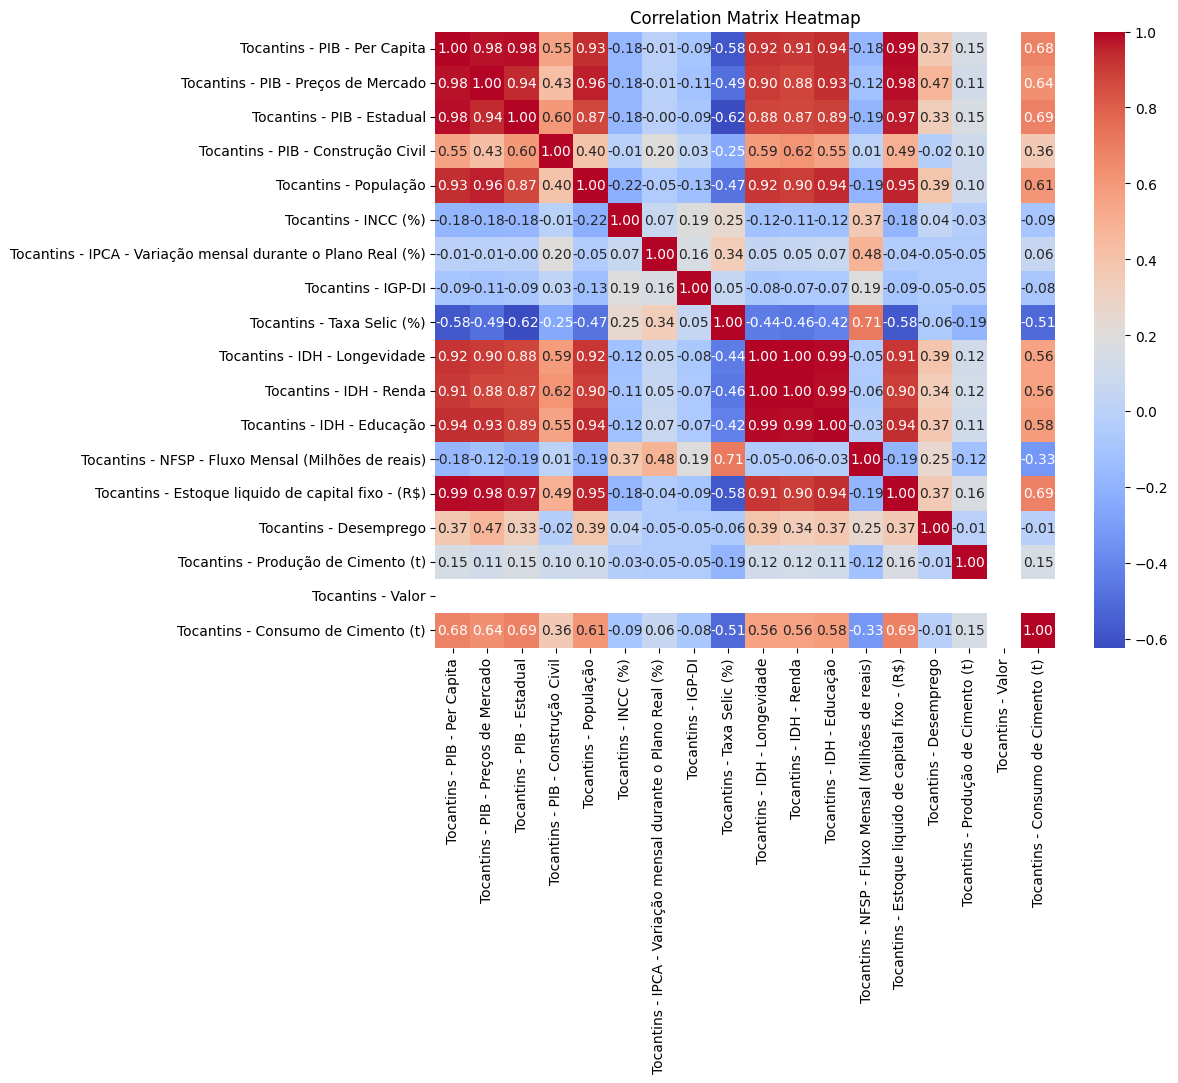

In [30]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [31]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
input_data = input_data.fillna(0.0)
input_data

,Tocantins - PIB - Per Capita,Tocantins - PIB - Preços de Mercado,Tocantins - PIB - Estadual,Tocantins - PIB - Construção Civil,Tocantins - População,Tocantins - INCC (%),Tocantins - IPCA - Variação mensal durante o Plano Real (%),Tocantins - IGP-DI,Tocantins - Taxa Selic (%),Tocantins - IDH - Longevidade,Tocantins - IDH - Renda,Tocantins - IDH - Educação,Tocantins - NFSP - Fluxo Mensal (Milhões de reais),Tocantins - Estoque liquido de capital fixo - (R$),Tocantins - Desemprego,Tocantins - Produção de Cimento (t),Tocantins - Valor
0,-1.402866,-1.244693,-1.371072,-0.204367,-1.423673,1.998868,4.052332,3.466715,2.303195,-0.932077,-0.935414,-0.922738,3.108599,-1.539424,0.797442,0.000000,0.0
1,-1.402866,-1.244693,-1.371072,-0.204367,-1.423673,1.647487,-0.596188,2.630940,2.745235,-0.932077,-0.935414,-0.922738,3.275709,-1.411460,0.797442,0.000000,0.0
2,-1.402866,-1.244693,-1.371072,-0.204367,-1.423673,1.425561,0.131839,1.716318,2.879123,-0.932077,-0.935414,-0.922738,3.597074,-1.411460,0.797442,-1.030909,0.0
3,-1.402866,-1.244693,-1.371072,-0.204367,-1.423673,1.407068,0.706121,1.826703,3.016721,-0.932077,-0.935414,-0.922738,3.738475,-1.411460,0.797442,-0.126044,0.0
4,-1.402866,-1.244693,-1.371072,-0.204367,-1.423673,0.519367,1.167355,-0.144465,3.017322,-0.932077,-0.935414,-0.922738,3.879875,-1.411460,0.797442,-0.824038,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.401900,1.860962,1.181355,-0.705000,1.636618,-0.590259,-0.966985,-1.264088,-0.729479,1.312266,1.069045,1.285185,-0.374997,1.441346,3.290851,-0.423353,0.0
176,1.401900,1.860962,1.181355,-0.705000,1.636618,-0.479297,-0.881068,-0.412544,-0.941281,1.312266,1.069045,1.285185,-0.439270,1.441346,3.290851,-1.189023,0.0
177,1.401900,1.860962,1.181355,-0.705000,1.636618,-1.034110,-0.808718,0.186692,-1.140710,1.312266,1.069045,1.285185,-0.503543,1.441346,3.290851,-0.181598,0.0
178,1.401900,1.860962,1.181355,-0.705000,1.636618,-0.571766,-0.614276,-0.633314,-1.226481,1.312266,1.069045,1.285185,-0.503543,1.441346,3.367209,0.000000,0.0


In [32]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Tocantins - PIB - Per Capita,Tocantins - PIB - Preços de Mercado,Tocantins - PIB - Estadual,Tocantins - PIB - Construção Civil,Tocantins - População,Tocantins - INCC (%),Tocantins - IPCA - Variação mensal durante o Plano Real (%),Tocantins - IGP-DI,Tocantins - Taxa Selic (%),Tocantins - IDH - Longevidade,Tocantins - IDH - Renda,Tocantins - IDH - Educação,Tocantins - NFSP - Fluxo Mensal (Milhões de reais),Tocantins - Estoque liquido de capital fixo - (R$),Tocantins - Desemprego,Tocantins - Produção de Cimento (t),Tocantins - Valor
0,-1.402866,-1.244693,-1.371072,-0.204367,-1.423673,1.998868,4.052332,3.466715,2.303195,-0.932077,-0.935414,-0.922738,3.108599,-1.539424,0.797442,0.000000,0.0
1,-1.402866,-1.244693,-1.371072,-0.204367,-1.423673,1.647487,-0.596188,2.630940,2.745235,-0.932077,-0.935414,-0.922738,3.275709,-1.411460,0.797442,0.000000,0.0
2,-1.402866,-1.244693,-1.371072,-0.204367,-1.423673,1.425561,0.131839,1.716318,2.879123,-0.932077,-0.935414,-0.922738,3.597074,-1.411460,0.797442,-1.030909,0.0
3,-1.402866,-1.244693,-1.371072,-0.204367,-1.423673,1.407068,0.706121,1.826703,3.016721,-0.932077,-0.935414,-0.922738,3.738475,-1.411460,0.797442,-0.126044,0.0
4,-1.402866,-1.244693,-1.371072,-0.204367,-1.423673,0.519367,1.167355,-0.144465,3.017322,-0.932077,-0.935414,-0.922738,3.879875,-1.411460,0.797442,-0.824038,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.381198,1.568667,1.237566,0.441072,1.469690,-0.238878,0.629248,-1.406012,0.272188,1.128304,1.069045,1.225832,0.794771,1.416222,1.000087,0.000000,0.0
164,1.381198,1.568667,1.237566,0.441072,1.469690,-0.608753,0.837256,-0.112926,0.272188,1.128304,1.069045,1.225832,0.730498,1.416222,1.076446,0.000000,0.0
165,1.381198,1.568667,1.237566,0.441072,1.469690,-0.534778,0.877953,-0.743700,0.272188,1.128304,1.069045,1.225832,0.743353,1.416222,1.152805,0.000000,0.0
166,1.381198,1.568667,1.237566,0.441072,1.469690,-0.756703,1.000045,-0.586006,0.248413,1.128304,1.069045,1.225832,0.614807,1.416222,1.152805,0.000000,0.0


In [33]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0      29.644
1      25.375
2      25.608
3      30.043
4      28.702
        ...  
163    38.793
164    38.281
165    39.711
166    33.695
167    28.206
Name: Tocantins - Consumo de Cimento (t), Length: 168, dtype: float64

In [34]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [35]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 17)

In [36]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Tocantins - PIB - Per Capita,Tocantins - PIB - Preços de Mercado,Tocantins - PIB - Estadual,Tocantins - PIB - Construção Civil,Tocantins - População,Tocantins - INCC (%),Tocantins - IPCA - Variação mensal durante o Plano Real (%),Tocantins - IGP-DI,Tocantins - Taxa Selic (%),Tocantins - IDH - Longevidade,Tocantins - IDH - Renda,Tocantins - IDH - Educação,Tocantins - NFSP - Fluxo Mensal (Milhões de reais),Tocantins - Estoque liquido de capital fixo - (R$),Tocantins - Desemprego,Tocantins - Produção de Cimento (t),Tocantins - Valor
132,1.127602,0.960206,1.086127,0.919559,1.122594,-0.960135,1.058830,0.297077,-0.755853,0.944341,1.069045,1.107127,-0.285015,0.834026,-0.221654,-1.043916,0.0
133,1.127602,0.960206,1.086127,0.919559,1.122594,0.482379,-1.364912,-0.160234,-0.688658,0.944341,1.069045,1.107127,-0.349288,1.129318,0.160140,0.000000,0.0
134,1.127602,0.960206,1.086127,0.919559,1.122594,-0.534778,-1.052901,0.549386,-0.626634,0.944341,1.069045,1.107127,-0.374997,1.129318,0.389217,0.000000,0.0
135,1.127602,0.960206,1.086127,0.919559,1.122594,-0.627247,-0.627842,1.542855,-0.571481,0.944341,1.069045,1.107127,-0.259306,1.129318,0.236499,0.000000,0.0
136,1.127602,0.960206,1.086127,0.919559,1.122594,0.482379,-0.320352,-0.081387,-0.516512,0.944341,1.069045,1.107127,-0.053632,1.129318,0.083781,0.000000,0.0
137,1.127602,0.960206,1.086127,0.919559,1.122594,2.646150,-0.107822,-1.500628,-0.510405,0.944341,1.069045,1.107127,0.023495,1.129318,-0.068936,0.000000,0.0
138,1.127602,0.960206,1.086127,0.919559,1.122594,0.075516,0.082098,-1.784477,-0.510405,0.944341,1.069045,1.107127,-0.002214,1.129318,-0.145295,0.000000,0.0
139,1.127602,0.960206,1.086127,0.919559,1.122594,0.241960,0.086620,-1.658322,-0.510405,0.944341,1.069045,1.107127,-0.143614,1.129318,-0.298012,0.000000,0.0
140,1.127602,0.960206,1.086127,0.919559,1.122594,-0.997122,0.204189,-0.696392,-0.510054,0.944341,1.069045,1.107127,-0.182178,1.129318,-0.450730,0.000000,0.0
141,1.127602,0.960206,1.086127,0.919559,1.122594,-0.867666,0.470982,-0.759469,-0.510405,0.944341,1.069045,1.107127,-0.105051,1.129318,-0.603448,0.000000,0.0


In [37]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 17)

In [38]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(36, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(72, activation='tanh', return_sequences=True, 
                             kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.LSTM(36, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.07,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [39]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [40]:
def predictor(model, test_input, test_target, start_target):
    
    predictions = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        if (prediction[0][0] < 0.0):
            return None, None
        predictions.append(prediction[0][0])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    return df_results, predictions

In [41]:
def statistical_validator(train_input, train_target, test_input, test_target, start_target):
    
    pd.set_option('display.max_columns', None)
    predictions_list = []
    error_percent = []
    
    i = 0
    while i < 10:
        winner_seed = get_a_good_seed(train_input, train_target, test_input, test_target)
        trained_model, history = lstm_model(train_input, 
                                            train_target, 
                                            want_verbose=0, 
                                            seed=winner_seed)
        df_results, predictions = predictor(trained_model, 
                                            test_input, 
                                            test_target, 
                                            start_index)
        if predictions is not None:
            display(df_results.T)
            predictions_list.append(predictions)
            i += 1
        
    predictions_means = np.mean(predictions_list, axis=0)
    results_data = []
   
    for j in range(12):
        target = test_target[start_target + j]
        error = np.abs(predictions_means[j] - target)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                            predictions_means[j], 
                            target, 
                            error])
    display("FINAL___________________________________________________________________")
    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])
    display(df_results.T)
        
    mae_mean = np.mean(predictions_means)
    mape_mean = np.mean(error_percent) 

    return mae_mean, mape_mean

In [42]:
mae, mape = statistical_validator(reshaped_train, 
                                  reshaped_target, 
                                  reshaped_test, 
                                  reshaped_test_target, 
                                  start_index)

[2058992486, 23278450, 2766525864, 3380300383, 3216765327, 176108376, 2596501298, 547936507, 412592616, 1457511561]


Step: 0 ___________________________________________
val_loss: 82.35726165771484
winner_seed: 2058992486


Step: 1 ___________________________________________
val_loss: 79.25005340576172
winner_seed: 23278450


Step: 2 ___________________________________________
val_loss: 80.98421478271484


Step: 3 ___________________________________________
val_loss: 68.63796997070312
winner_seed: 3380300383


Step: 4 ___________________________________________
val_loss: 71.19117736816406


Step: 5 ___________________________________________
val_loss: 59.16599655151367
winner_seed: 176108376


Step: 6 ___________________________________________
val_loss: 72.86795043945312


Step: 7 ___________________________________________
val_loss: 61.16768264770508


Step: 8 ___________________________________________
val_loss: 87.26740264892578


Step: 9 ___________________________________________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,37.857399,37.477757,38.356369,39.983471,41.184254,45.734249,49.225185,49.569839,53.440636,56.329235,56.053596,52.07341
Target,31.615,30.275,29.568,26.94,35.91,33.954,37.983,40.046,32.647,39.065,36.18,28.749
Error,6.242399,7.202757,8.788368,13.04347,5.274254,11.780251,11.242184,9.523838,20.793636,17.264236,19.873596,23.324409


[1507822049, 3978195119, 2359188150, 2298855701, 3562689354, 3376438504, 218924457, 1899325749, 1660301680, 2836243869]


Step: 0 ___________________________________________
val_loss: 84.3249740600586
winner_seed: 1507822049


Step: 1 ___________________________________________
val_loss: 75.4952392578125
winner_seed: 3978195119


Step: 2 ___________________________________________
val_loss: 79.95723724365234


Step: 3 ___________________________________________
val_loss: 78.7071304321289


Step: 4 ___________________________________________
val_loss: 88.15825653076172


Step: 5 ___________________________________________
val_loss: 51.36106491088867
winner_seed: 3376438504


Step: 6 ___________________________________________
val_loss: 49.80552673339844
winner_seed: 218924457


Step: 7 ___________________________________________
val_loss: 78.18794250488281


Step: 8 ___________________________________________
val_loss: 74.90057373046875


Step: 9 ________________________________________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,34.844505,33.679314,34.577854,35.485313,40.857658,45.160782,49.448872,51.154499,55.814602,57.359402,51.726315,47.938515
Target,31.615,30.275,29.568,26.94,35.91,33.954,37.983,40.046,32.647,39.065,36.18,28.749
Error,3.229506,3.404314,5.009853,8.545313,4.947659,11.206783,11.46587,11.108498,23.167603,18.294403,15.546314,19.189514


[3369845898, 906720927, 334125602, 2679891579, 2703818337, 1422912126, 2926085590, 3278871243, 3151215626, 1209520232]


Step: 0 ___________________________________________
val_loss: 91.37167358398438
winner_seed: 3369845898


Step: 1 ___________________________________________
val_loss: 76.97148132324219
winner_seed: 906720927


Step: 2 ___________________________________________
val_loss: 59.287200927734375
winner_seed: 334125602


Step: 3 ___________________________________________
val_loss: 82.63652801513672


Step: 4 ___________________________________________
val_loss: 92.73944854736328


Step: 5 ___________________________________________
val_loss: 68.06829833984375


Step: 6 ___________________________________________
val_loss: 83.77136993408203


Step: 7 ___________________________________________
val_loss: 72.36532592773438


Step: 8 ___________________________________________
val_loss: 71.59954833984375


Step: 9 ___________________________________________
val_loss: 73.01995

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,44.63483,44.21632,44.928585,46.188137,47.494034,48.666962,49.679001,50.422092,51.971718,52.855801,53.059422,52.969349
Target,31.615,30.275,29.568,26.94,35.91,33.954,37.983,40.046,32.647,39.065,36.18,28.749
Error,13.019831,13.94132,15.360584,19.248137,11.584034,14.712963,11.695999,10.376091,19.324718,13.790802,16.879421,24.220348


[1206244052, 3582047220, 1905126972, 202997919, 2876545155, 3866186813, 1341822954, 2193859436, 3906802204, 1799126916]


Step: 0 ___________________________________________
val_loss: 79.63185119628906
winner_seed: 1206244052


Step: 1 ___________________________________________
val_loss: 61.742340087890625
winner_seed: 3582047220


Step: 2 ___________________________________________
val_loss: 55.90209197998047
winner_seed: 1905126972


Step: 3 ___________________________________________
val_loss: 77.2313461303711


Step: 4 ___________________________________________
val_loss: 52.8416862487793
winner_seed: 2876545155


Step: 5 ___________________________________________
val_loss: 80.1343002319336


Step: 6 ___________________________________________
val_loss: 44.74755859375
winner_seed: 1341822954


Step: 7 ___________________________________________
val_loss: 107.09654235839844


Step: 8 ___________________________________________
val_loss: 75.72625732421875


Step: 9 ________________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,34.813606,34.468346,36.777821,37.250809,39.623871,41.878288,48.108837,48.188198,51.611256,56.020283,57.303799,56.477222
Target,31.615,30.275,29.568,26.94,35.91,33.954,37.983,40.046,32.647,39.065,36.18,28.749
Error,3.198606,4.193346,7.20982,10.310808,3.713871,7.92429,10.125835,8.142197,18.964256,16.955284,21.123798,27.728222


[3074663351, 827419484, 818836798, 18683589, 577046490, 2174685181, 1038291247, 2769556989, 3509445066, 3530041895]


Step: 0 ___________________________________________
val_loss: 65.75311279296875
winner_seed: 3074663351


Step: 1 ___________________________________________
val_loss: 73.2482681274414


Step: 2 ___________________________________________
val_loss: 96.023681640625


Step: 3 ___________________________________________
val_loss: 57.032508850097656
winner_seed: 18683589


Step: 4 ___________________________________________
val_loss: 45.33835220336914
winner_seed: 577046490


Step: 5 ___________________________________________
val_loss: 56.479278564453125


Step: 6 ___________________________________________
val_loss: 77.34557342529297


Step: 7 ___________________________________________
val_loss: 84.78157806396484


Step: 8 ___________________________________________
val_loss: 71.98655700683594


Step: 9 ___________________________________________
val_loss: 68.71260833740

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,35.858418,33.467346,35.031178,36.250378,39.568806,44.643375,45.779137,47.365837,51.784969,55.728855,53.462055,49.52837
Target,31.615,30.275,29.568,26.94,35.91,33.954,37.983,40.046,32.647,39.065,36.18,28.749
Error,4.243418,3.192347,5.463177,9.310377,3.658806,10.689377,7.796135,7.319836,19.13797,16.663857,17.282055,20.779369


[3248523633, 1235604945, 504080386, 400246595, 3621324590, 2037522724, 1137534117, 1463174432, 4106014207, 1040867690]


Step: 0 ___________________________________________
val_loss: 42.67845153808594
winner_seed: 3248523633


Step: 1 ___________________________________________
val_loss: 63.0494270324707


Step: 2 ___________________________________________
val_loss: 92.1684799194336


Step: 3 ___________________________________________
val_loss: 71.34567260742188


Step: 4 ___________________________________________
val_loss: 68.42547607421875


Step: 5 ___________________________________________
val_loss: 71.8211669921875


Step: 6 ___________________________________________
val_loss: 66.04572296142578


Step: 7 ___________________________________________
val_loss: 72.12422943115234


Step: 8 ___________________________________________
val_loss: 88.27950286865234


Step: 9 ___________________________________________
val_loss: 73.03756713867188
1/1 [==============================] - 0

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,38.850624,36.247196,38.199703,41.773773,45.03846,47.564789,50.289959,52.763363,55.25285,55.872841,55.529835,55.011856
Target,31.615,30.275,29.568,26.94,35.91,33.954,37.983,40.046,32.647,39.065,36.18,28.749
Error,7.235624,5.972197,8.631702,14.833773,9.12846,13.61079,12.306957,12.717361,22.60585,16.807842,19.349834,26.262856


[2712152303, 650088999, 2296349109, 1895950206, 3960973607, 1013085172, 2066959449, 2711067479, 3966485888, 1828525766]


Step: 0 ___________________________________________
val_loss: 50.174678802490234
winner_seed: 2712152303


Step: 1 ___________________________________________
val_loss: 71.33688354492188


Step: 2 ___________________________________________
val_loss: 89.36769104003906


Step: 3 ___________________________________________
val_loss: 96.62702941894531


Step: 4 ___________________________________________
val_loss: 78.1760482788086


Step: 5 ___________________________________________
val_loss: 77.192626953125


Step: 6 ___________________________________________
val_loss: 68.49459838867188


Step: 7 ___________________________________________
val_loss: 85.0925064086914


Step: 8 ___________________________________________
val_loss: 55.443519592285156


Step: 9 ___________________________________________
val_loss: 81.31071472167969
1/1 [==============================] -

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,38.583931,33.712643,33.835415,38.665489,44.022236,48.451927,51.57666,53.496326,54.330795,54.10326,52.93861,51.73019
Target,31.615,30.275,29.568,26.94,35.91,33.954,37.983,40.046,32.647,39.065,36.18,28.749
Error,6.968931,3.437643,4.267414,11.725489,8.112236,14.497929,13.593658,13.450325,21.683796,15.038261,16.75861,22.98119


[3913243139, 2713399678, 925340364, 1446009644, 3888795070, 1462922876, 1773483136, 249015337, 1441657788, 217118781]


Step: 0 ___________________________________________
val_loss: 75.31639862060547
winner_seed: 3913243139


Step: 1 ___________________________________________
val_loss: 87.86253356933594


Step: 2 ___________________________________________
val_loss: 67.35877990722656
winner_seed: 925340364


Step: 3 ___________________________________________
val_loss: 62.05693817138672
winner_seed: 1446009644


Step: 4 ___________________________________________
val_loss: 71.67918395996094


Step: 5 ___________________________________________
val_loss: 82.1028060913086


Step: 6 ___________________________________________
val_loss: 63.72241973876953


Step: 7 ___________________________________________
val_loss: 83.4801025390625


Step: 8 ___________________________________________
val_loss: 77.4832763671875


Step: 9 ___________________________________________
val_loss: 62.092834472

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,41.477638,38.591999,39.384373,42.019512,44.260311,47.012497,50.253494,50.826221,54.011951,55.755253,55.327866,54.655758
Target,31.615,30.275,29.568,26.94,35.91,33.954,37.983,40.046,32.647,39.065,36.18,28.749
Error,9.862638,8.316999,9.816372,15.079512,8.350311,13.058498,12.270493,10.78022,21.364952,16.690254,19.147865,25.906757


[426465955, 3461337665, 546382619, 887224443, 3569387510, 3760370762, 4098100952, 878103804, 3928537847, 1688235233]


Step: 0 ___________________________________________
val_loss: 45.14752197265625
winner_seed: 426465955


Step: 1 ___________________________________________
val_loss: 66.93866729736328


Step: 2 ___________________________________________
val_loss: 63.17778396606445


Step: 3 ___________________________________________
val_loss: 55.873374938964844


Step: 4 ___________________________________________
val_loss: 62.31513214111328


Step: 5 ___________________________________________
val_loss: 80.84042358398438


Step: 6 ___________________________________________
val_loss: 68.60469055175781


Step: 7 ___________________________________________
val_loss: 78.46870422363281


Step: 8 ___________________________________________
val_loss: 50.039730072021484


Step: 9 ___________________________________________
val_loss: 68.47864532470703
1/1 [==============================] -

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,34.513824,32.542461,34.882618,38.478001,43.010029,43.220287,49.196541,49.998825,51.780834,53.188572,48.179268,44.693935
Target,31.615,30.275,29.568,26.94,35.91,33.954,37.983,40.046,32.647,39.065,36.18,28.749
Error,2.898825,2.267462,5.314617,11.538,7.100029,9.266289,11.213539,9.952824,19.133835,14.123573,11.999268,15.944935


[2676170097, 2294162035, 3697934527, 540411485, 1197462931, 1455230561, 2485125592, 1743585987, 946360085, 1674413433]


Step: 0 ___________________________________________
val_loss: 67.81095123291016
winner_seed: 2676170097


Step: 1 ___________________________________________
val_loss: 58.468040466308594
winner_seed: 2294162035


Step: 2 ___________________________________________
val_loss: 58.89928436279297


Step: 3 ___________________________________________
val_loss: 90.88909149169922


Step: 4 ___________________________________________
val_loss: 58.344398498535156
winner_seed: 1197462931


Step: 5 ___________________________________________
val_loss: 103.08084869384766


Step: 6 ___________________________________________
val_loss: 56.415260314941406
winner_seed: 2485125592


Step: 7 ___________________________________________
val_loss: 99.76211547851562


Step: 8 ___________________________________________
val_loss: 67.51039123535156


Step: 9 _________________________________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,33.967369,33.078751,34.203377,36.642612,41.866222,45.797325,50.609081,48.987041,53.631092,55.975742,53.708946,49.830135
Target,31.615,30.275,29.568,26.94,35.91,33.954,37.983,40.046,32.647,39.065,36.18,28.749
Error,2.352369,2.803751,4.635376,9.702612,5.956223,11.843327,12.62608,8.94104,20.984093,16.910744,17.528946,21.081135


'FINAL___________________________________________________________________'

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11
Prediction,37.540215,35.748211,37.017727,39.27375,42.692589,45.813046,49.416676,50.277225,53.363068,55.318928,53.728966,51.490875
Target,31.615,30.275,29.568,26.94,35.91,33.954,37.983,40.046,32.647,39.065,36.18,28.749
Error,5.925215,5.473211,7.449727,12.33375,6.782589,11.859046,11.433676,10.231225,20.716068,16.253928,17.548966,22.741875


In [43]:
display(mae)
display(mape)

45.97344

0.3749455013019542